In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Налаштування для графіків
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

def show_image(image_tensor, title="Original Image"):
    # If tensor has multiple channels, take the first few for visualization
    if image_tensor.dim() == 3:
        image_tensor = image_tensor[:3]  # Take first 3 channels if more exist
    elif image_tensor.dim() == 4:
        image_tensor = image_tensor[0, :3]  # Take first 3 channels of first batch item

    # Normalize for visualization
    image_tensor = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())

    plt.figure(figsize=(5, 5))
    plt.imshow(transforms.ToPILImage()(image_tensor))
    plt.axis('off')
    plt.title(title)
    plt.show()




In [84]:
conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
pool = nn.MaxPool2d(2, 2)

# Додавання нормалізації та Dropout
batch_norm1 = nn.BatchNorm2d(64)
batch_norm2 = nn.BatchNorm2d(128)
batch_norm3 = nn.BatchNorm2d(256)
dropout = nn.Dropout(p=0.3)
relu = nn.ReLU()
softmax = nn.LogSoftmax(dim=1)

test_tensor = torch.zeros(1, 3, 32, 32)  # Подаємо фейковий вхід
out = pool(relu(batch_norm1(conv1(test_tensor))))
out = pool(relu(batch_norm2(conv2(out))))
out = pool(relu(batch_norm3(conv3(out))))
flatten_size = out.view(-1).shape[0]

# Лінійні шари
fc1 = nn.Linear(flatten_size, 512)
fc2 = nn.Linear(512, 10)

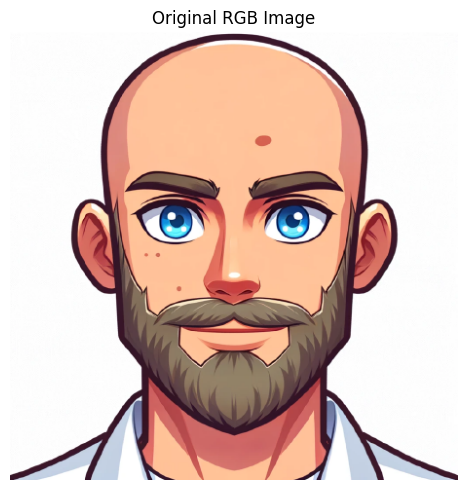

In [71]:
# Завантаження зображення
image_path = '/content/1.png'
image = Image.open(image_path).convert('RGB')

image_tensor = transforms.ToTensor()(image)

show_image(image_tensor, title="Original RGB Image")

In [72]:
image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension



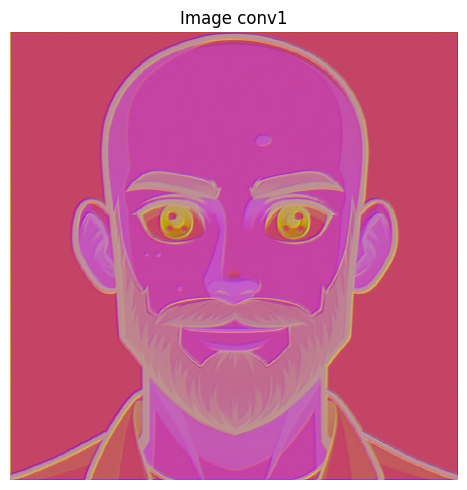

In [73]:
image_tensor = conv1(image_tensor)
show_image(image_tensor.squeeze(0), title="Image conv1")


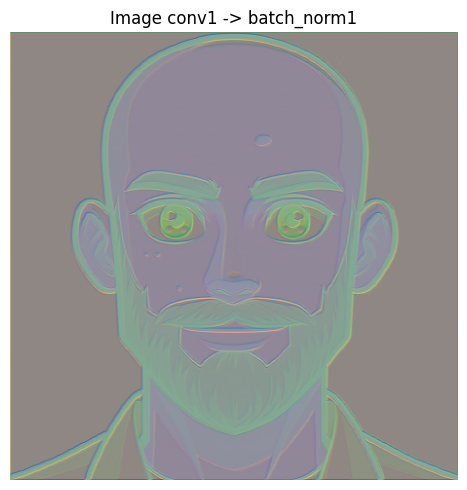

In [74]:

image_tensor = batch_norm1(image_tensor)
show_image(image_tensor.squeeze(0), title="Image conv1 -> batch_norm1")


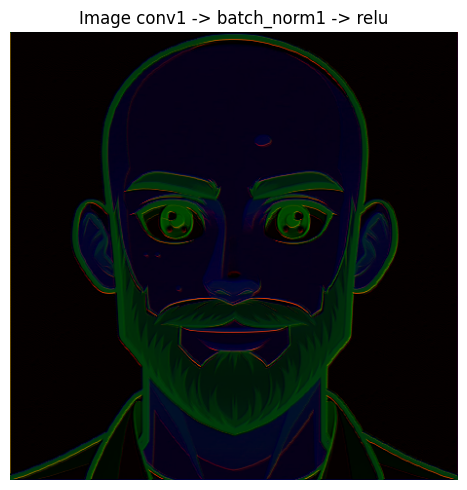

In [75]:

image_tensor = relu(image_tensor)
show_image(image_tensor.squeeze(0), title="Image conv1 -> batch_norm1 -> relu")


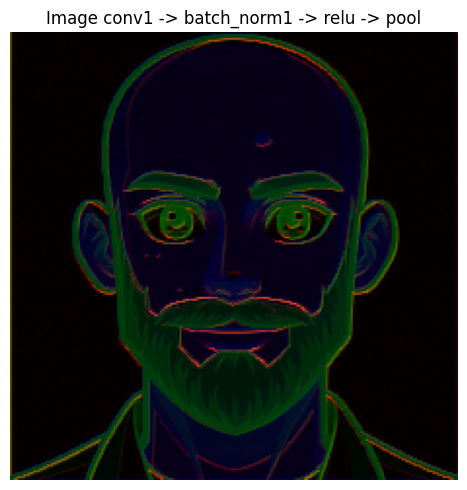

In [76]:

image_tensor = pool(image_tensor)
show_image(image_tensor.squeeze(0), title="Image conv1 -> batch_norm1 -> relu -> pool")

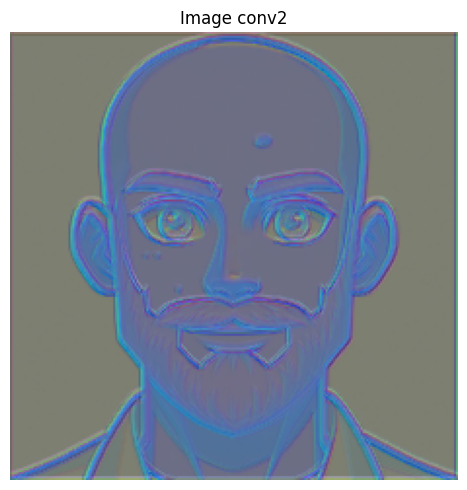

In [77]:
image_tensor = conv2(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x1 -> conv2")


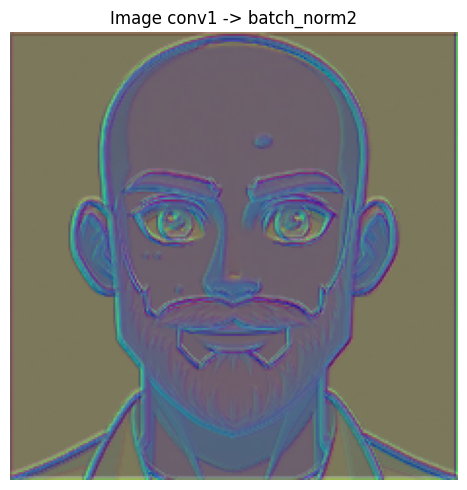

In [78]:

image_tensor = batch_norm2(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x1 -> conv2 -> batch_norm2")


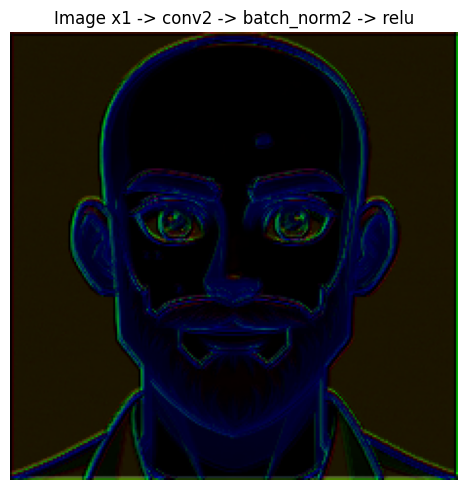

In [79]:

image_tensor = relu(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x1 -> conv2 -> batch_norm2 -> relu")


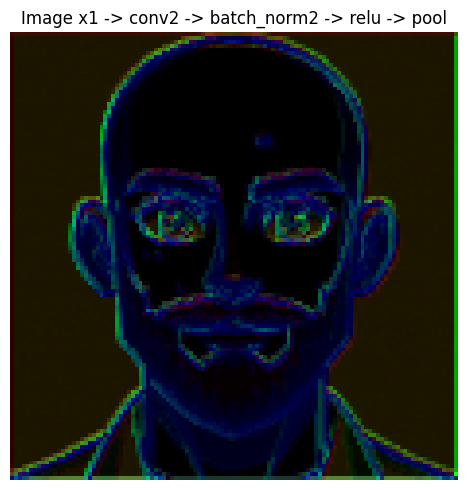

In [80]:

image_tensor = pool(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x1 -> conv2 -> batch_norm2 -> relu -> pool")

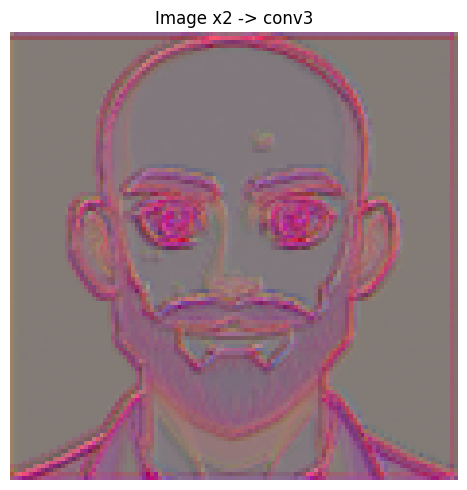

In [81]:
image_tensor = conv3(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x2 -> conv3")


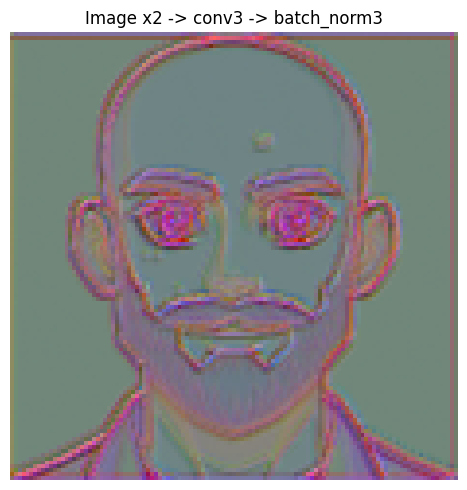

In [82]:

image_tensor = batch_norm3(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x2 -> conv3 -> batch_norm3")


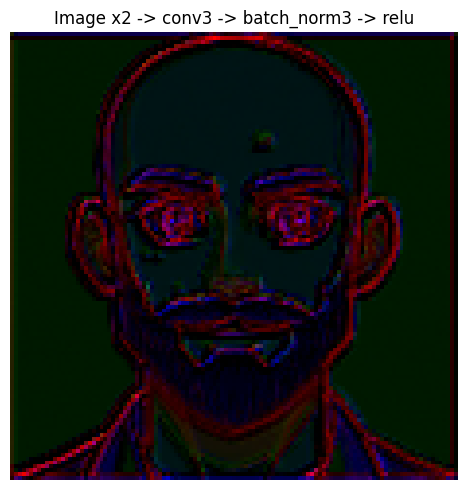

In [85]:

image_tensor = relu(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x2 -> conv3 -> batch_norm3 -> relu")


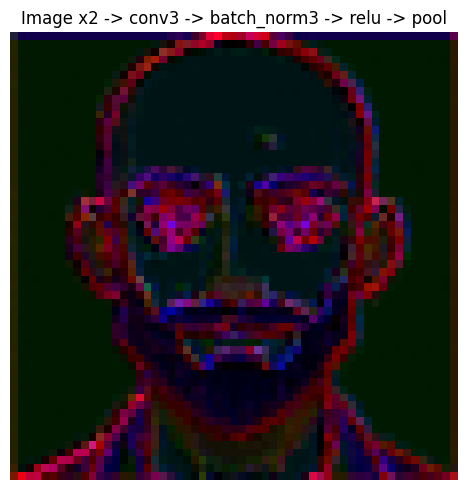

In [86]:

image_tensor = pool(image_tensor)
show_image(image_tensor.squeeze(0), title="Image x2 -> conv3 -> batch_norm3 -> relu -> pool")